<a href="https://colab.research.google.com/github/limlimlim99/limjihyeonjjang/blob/main/limjihyeonjjang/%ED%86%B5%EA%B3%84/object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


객체 탐지
- 한 이미지에서 객체와 그 경계 상자를 탐지
- 객체 탐지 알고리즘은 일반적으로 이미지를 입력으로 받고 경계 상자와 객체
클래스 리스트를 출력
- 경계 상자에 대해 그에 대응하는 예측 클래스와 클래스의 신뢰도를 출력

Applications
- 자율 주행 자동차에서 다른 자동차와 보행자를 찾을 때
- 의료 분야에서 방사선 사진을 사용해 종양이나 위험한 조직을 찾을 때
- 제조업에서 조립 로봇이 제품을 조립하거나 수리할 때
- 보안 산업에서 위협을 탐지하거나 사람 수를 셀 때

Bounding Box
- 이미지에서 하나의 객체 전체를 포함하는 가장 작은 직사각형

  <img src="https://miro.medium.com/max/850/1*KL6r494Eyfh3iYEXQA2tzg.png">

  <sub>[이미지 출처] https://medium.com/anolytics/how-bounding-box-annotation-helps-object-detection-in-machine-learning-use-cases-431d93e7b25b</sub>


https://becominghuman.ai/how-bounding-box-annotation-helps-object-detection-in-machine-learning-use-cases-431d93e7b25b

In [ ]:
# 객체탐지: 지도학습을 하는 것임. (클래스 리스트를 받음)

IOU(Intersection Over Union)
- 실측값(Ground Truth) 과 모델이 예측한 값이 얼마나 겹치는지를 나타내는 지표
IOU = Area of Overlap / Area of Union  
IOU가 높을수록 잘 예측한 모델

  <img src="https://pyimagesearch.com/wp-content/uploads/2016/09/iou_equation.png" width="300">
<br>
  <img src="https://pyimagesearch.com/wp-content/uploads/2016/09/iou_examples.png" width="400">

<br>

- 예시
  <img src="https://www.pyimagesearch.com/wp-content/uploads/2016/09/iou_stop_sign.jpg">

  <sub>[이미지 출처] https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/</sub>

https://pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/

- True Positive(TP) : 실제 True인 정답을 True라고 예측 (정답)
- False Positive(FP) : 실제 False인 정답을 True라고 예측 (오답)
- False Negative(FN) : 실제 True인 정답을 False라고 예측 (오답)
- True Negative(TN) : 실제 False인 정답을 False라고 예측 (정답)

-  Precision(정밀도) : 예측 한 것 중에 맞는 것 - tp / tp+fp
-  Recall(재현율)    : tp / tp+fn

- https://sumniya.tistory.com/26

* RCNN (2013)
  - Rich feature hierarchies for accurate object detection and semantic segmentation (https://arxiv.org/abs/1311.2524)
  - 물체 검출에 사용된 기존 방식인 sliding window는 background를 검출하는 소요되는 시간이 많았는데, 이를 개선시킨 기법으로 Region Proposal 방식 제안
  - 매우 높은 Detection이 가능하지만, 복잡한 아키텍처 및 학습 프로세스로 인해 Detection 시간이 매우 오래 걸림

* SPP Net (2014)
  - Spatial Pyramid Pooling in Deep Convolutional Networks for Visual Recognition (https://arxiv.org/abs/1406.4729)
  - RCNN의 문제를 Selective search로 해결하려 했지만, bounding box의 크기가 제각각인 문제가 있어서 FC Input에 고정된 사이즈로 제공하기 위한 방법 제안
  - SPP은 RCNN에서 conv layer와 fc layer사이에 위치하여 서로 다른 feature map에 투영된 이미지를 고정된 값으로 풀링
  - SPP를 이용해 RCNN에 비해 실행시간을 매우 단축시킴

* Fast RCNN (2015)
  - Fast R-CNN (https://arxiv.org/abs/1504.08083)
  - SPP layer를 ROI pooling으로 바꿔서 7x7 layer 1개로 해결
  - SVM을 softmax로 대체하여 Classification 과 Regression Loss를 함께 반영한 Multi task Loss 사용
  - ROI Pooling을 이용해 SPP보다 간단하고, RCNN에 비해 수행시간을 많이 줄임

* Fater RCNN(2015)
  - Faster R-CNN: Towards Real-Time Object Detection with Region Proposal Networks (https://arxiv.org/abs/1506.01497)
  - RPN(Region proposal network) + Fast RCNN 방식
  - Selective Search를 대체하기 위한 Region Proposal Network구현
  - RPN도 학습시켜서 전체를 end-to-end로 학습 가능 (GPU사용 가능)
  - Region Proposal를 위해 Object가 있는지 없는지의 후보 Box인 Anchor Box 개념 사용
  - Anchor Box를 도입해 FastRCNN에 비해 정확도를 높이고 속도를 향상시킴

* SSD (2015)
  - SSD: Single Shot MultiBox Detector (https://arxiv.org/abs/1512.02325)
  - Faster-RCNN은 region proposal과 anchor box를 이용한 검출의 2단계를 걸치는 과정에서 시간이 필요해 real-time(20~30 fps)으로는 어려움
  - SSD는 Feature map의 size를 조정하고, 동시에 앵커박스를 같이 적용함으로써 1 shot으로 물체 검출이 가능
  - real-time으로 사용할 정도의 성능을 갖춤 (30~40 fps)
  - 작은 이미지의 경우에 잘 인식하지 못하는 경우가 생겨서 data augmentation을 통해 mAP를 63에서 74로 비약적으로 높임
  
* RetinaNet (2017)
  - Focal Loss for Dense Object Detection (https://arxiv.org/abs/1708.02002)
  - RetinaNet이전에는 1-shot detection과 2-shot detection의 차이가 극명하게 나뉘어 속도를 선택하면 정확도를 trade-off 할 수 밖에 없는 상황
  - RetinaNet은 Focal Loss라는 개념의 도입과 FPN 덕분에 기존 모델들보다 정확도도 높고 속도도 여타 1-shot detector와 비견되는 모델
  - Detection에선 검출하고 싶은 물체와 (foreground object) 검출할 필요가 없는 배경 물체들이 있는데 (background object) 배경 물체의 숫자가 매우 많을 경우 배경 Loss를 적게 하더라도 숫자에 압도되어 배경의 Loss의 총합을 학습해버림 (예를 들어, 숲을 배경으로 하는 사람을 검출해야하는데 배경의 나무가 100개나 되다보니 사람의 특징이 아닌 나무가 있는 배경을 학습해버림)

- Focal Loss는 이런 문제를 기존의 crossentropy 함수에서 (1-sig)을 제곱하여 background object의 loss를 현저히 줄여버리는 방법으로 loss를 변동시켜 해결
  - Focal Loss를 통해 검출하고자 하는 물체와 관련이 없는 background object들은 학습에 영향을 주지 않게 되고, 학습의 다양성이 더 넓어짐 (작은 물체, 큰 물체에 구애받지 않고 검출할 수 있게됨)
  - 실제로 RetinaNet은 object proposal을 2000개나 실시하여 이를 확인

* Mask R-CNN (2018)
  - Mask R-CNN (https://arxiv.org/pdf/1703.06870.pdf)

* YOLO (2018)
  - YOLOv3: An Incremental Improvement (https://arxiv.org/abs/1804.02767)
  - YOLO는 v1, v2, v3의 순서로 발전하였는데, v1은 정확도가 너무 낮은 문제가 있었고 이 문제는 v2까지 이어짐
  - 엔지니어링적으로 보완한 v3는 v2보다 살짝 속도는 떨어지더라도 정확도를 대폭 높인 모델
  - RetinaNet과 마찬가지로 FPN을 도입해 정확도를 높임
  - RetinaNet에 비하면 정확도는 4mAP정도 떨어지지만, 속도는 더 빠르다는 장점

* RefineDet (2018)
  - Single-Shot Refinement Neural Network for Object Detection (https://arxiv.org/pdf/1711.06897.pdf)

* M2Det (2019)
  - M2Det: A Single-Shot Object Detector based on Multi-Level Feature Pyramid Network (https://arxiv.org/pdf/1811.04533.pdf)

* EfficientDet (2019)
  - EfficientDet: Scalable and Efficient Object Detection (https://arxiv.org/pdf/1911.09070v1.pdf)

* YOLOv4 (2020)
  - YOLOv4: Optimal Speed and Accuracy of Object Detection (https://arxiv.org/pdf/2004.10934v1.pdf)
  - YOLOv3에 비해 AP, FPS가 각각 10%, 12% 증가
  - YOLOv3와 다른 개발자인 AlexeyBochkousky가 발표
  - v3에서 다양한 딥러닝 기법(WRC, CSP ...) 등을 사용해 성능을 향상시킴
  - CSPNet 기반의 backbone(CSPDarkNet53)을 설계하여 사용
  - Backbone은 이미지로부터 Feature map을 추출하는 부분으로, CSP-Darknet를 사용합니다. YOLO v4의 백본과 유사합니다. YOLO v3의 Backbone은 Darknet53으로 CSP가 적용되지 않습니다. 특이하게도 YOLO v5의 backbone은 종류가 4가지나 됩니다. 제일 작고 가벼운 yolo v5-s부터 m, l, x 까지 포함해서 총 4가지 버전이 있습니다
  - Head는 추출된 Feature map을 바탕으로 물체의 위치를 찾는 부분입니다. 흔히 말하는 Anchor Box(Default Box)를 처음에 설정하고 이를 이용하여 최종적인 Bounding Box를 생성합니다. YOLO v3와 동일하게 3가지의 scale에서 바운딩 박스를 생성합니다. (8 pixel 정보를 가진 작은 물체, 16 pixel 정보를 가진 중간 물체, 32 pixel 정보를 가진 큰 물체를 인식 가능) 또한 각 스케일에서 3개의 앵커 박스를 사용합니다. 그러므로 총 9개의 앵커 박스가 있습니다.



## YOLO 아키텍처

- 백본 모델(backbone model) 기반
- 특징 추출기(Feature Extractor)라고도 불림
- YOLO는 자체 맞춤 아키텍쳐 사용

  <img src="https://user-images.githubusercontent.com/26322627/70716343-8e857200-1d2f-11ea-8e60-9c75f24ca9ce.png">


https://blog.devstory.co.kr/post/pj-too-real-03/

## Yolov5

You Only Look Once 의 약자로 Object detection 분야에서 많이 알려진 모델이다.

처음으로 one-stage-detection 방법을 고안하여 실시간으로 Object Detection이 가능하게 만들었다.

#### Yolov5 특징
1. 이미지 전체를 한번만 보는 것

R-CNN: 이미지를 여러장으로 분할하고 CNN 모델을 이용하여 이미지를 분석했다. 따라서 이미지 한장을 보더라도 여러장의 이미지를 분석하는 것과 같았다. 하지만 YOLO는 이러한 과정없이 이미지를 한 번만 보는 특징을 가지고 있다.

### Object Detection의 구조와 종류 : https://ssong915.tistory.com/43

- 백본(Backbone)은 입력이미지를 feature map으로 변형시켜주는 부분이다.

- 헤드(Head)는 Backbone에서 추출한 feature map의 location 작업을 해주는 부분으로, predict classes 와 bounding boxes 작업이 수행된다. 헤드는 크게 Dense Prediction과 Sparse Prediction으로 나누어진다.

- Sparse Prediction을 사용하는 Two-Stage Detector: Predict Classes 와 Bounding Box Regression 분리 ex) R-CNN, R-FCN 
- Dense Prediction을 사용하는 One-Stage Detector: Predict Classes 와 Bounding Box Regression 통합 ex) YOLO, SSD

- 넥(Neck) 은 Backbone 과 Head를 연결하는 부분으로, feature map을 정제하고 재구성한다.

### 절차
input(이미지) → CNN → FC(Fully Connected) → PT(Prediction Tensor) 를 반복
- 이미지를 S*S의 그리드로 분할 (논문에서는 7*7)
그리드마다 하나의 객체를 예측한다. 미리 설정해 둔 경계를 통해서 객체의 위치와 크기를 파악한다. 여러 객체가 한 셀에 있으면 탐지를 못할 수도 있다. 각 Grid cell 은 조건이 있다.
 - B개의 boundary boxes를 예측하고, 각 box는 하나의 box confidence score을 가지고 있다.
    - 예측된 box 수에 관계 없이 단 하나의 객체만 탐지한다.
    - boundary box는 객체의 위치 (x,y), 객체의 크기 (w,h), box confidence score로 구성된다.
    - box confidence score는 box가 객체를 포함하고 있을 가능성을 반영한다.
 - C개의 conditional class probabilities를 예측한다.
    - 탐지된 객체가 어느 특정 클래스에 속하는 지에 대한 확률
- 이미지 전체를 신경망에 넣고 특징 추출을 통해 예측 텐서(Prediction Tensor) 생성
    - S * S * (B*5 +C)
    - 7x7 grids, 2 boundary boxes, 20 classes = 7* 7 * 30
    - 이제 YOLO는 7730 텐서를 예측하는 CNN 네트워크를 구축해야한다.


## YOLO Backbone

- 백본 모델(backbone model) 기반

- 특징 추출기(Feature Extractor)라고도 불림

- YOLO는 자체 맞춤 아키텍쳐 사용

- 어떤 특징 추출기 아키텍쳐를 사용했는지에 따라 성능 달라짐

  <img src="https://www.researchgate.net/publication/335865923/figure/fig1/AS:804106595758082@1568725360777/Structure-detail-of-YOLOv3It-uses-Darknet-53-as-the-backbone-network-and-uses-three.jpg">

  <sub>[이미지 출처] https://www.researchgate.net/figure/Structure-detail-of-YOLOv3It-uses-Darknet-53-as-the-backbone-network-and-uses-three_fig1_335865923</sub>

- 마지막 계층은 크기가 $w \times h \times D$인 특징 볼륨 출력

- $w \times h $는 그리드의 크기이고, $D$는 특징 볼륨 깊이


## YOLO 계층 출력
- 마지막 계층 출력은 w x h x M 행렬
  - M = B x (C + 5)
    - B : 그리드 셀당 경계 상자 개수
    - C : 클래스 개수
  - 클래스 개수에 5를 더한 이유는 해당 값 만큼의 숫자를 예측해야 함
    - tx, ty는 중심 좌표
    - tw, th는 너비와 높이
    - c는 신뢰도
    - p1,p2,...pC는 클래스 1,2,..C의 객체를 포함할 확률
    - Objectness Score : 바운딩 박스에 객체가 포함될 있을 확률
  <br>

  <img src="https://www.researchgate.net/profile/Thi_Le3/publication/337705605/figure/fig3/AS:831927326089217@1575358339500/Structure-of-one-output-cell-in-YOLO.ppm">

  <sub>[이미지 출처] https://www.researchgate.net/figure/Structure-of-one-output-cell-in-YOLO_fig3_337705605</sub>


## 앵커 박스(Anchor Box)

- YOLOv2에서 도입

- 사전 정의된 상자(prior box)

- 객체에 가장 근접한 앵커 박스를 맞추고 신경망을 사용해 앵커 박스의 크기를 조정하는 과정때문에 $t_x, t_y, t_w, t_h$이 필요

  <img src="https://kr.mathworks.com/help/vision/ug/ssd_detection.png">

  <sub>[이미지 출처] https://kr.mathworks.com/help/vision/ug/getting-started-with-yolo-v2.html</sub>


<sub>[이미지 출처] https://kr.mathworks.com/help/vision/ug/getting-started-with-yolo-v2.html</sub>


# 파이토치

In [1]:
import torch

torch.__version__

'1.13.0+cu116'

# VOC

- 2005년부터 2012년까지 진행

- Object Detection 기술의 benchmark로 간주

- 데이터셋에는 20개의 클래스가 존재

- 훈련 및 검증 데이터 : 11,530개

- ROI에 대한 27,450개의 Annotation이 존재

- 이미지당 2.4개의 객체 존재

  <img src="https://paperswithcode.github.io/sotabench-eval/img/pascalvoc2012.png">

  <sub>[이미지 출처] https://paperswithcode.github.io/sotabench-eval/pascalvoc/</sub>


# COCO Dataset
- Common Objects in Context
- 200000개의 이미지
- 80개의 카테고리에 500000개 이상의 객체 Annotation이 존재

https://cocodataset.org/


- pytorch tutorials : https://tutorials.pytorch.kr/
- yolov3 pytorch 버전 : https://github.com/ultralytics/yolov3
- yolov5 : https://github.com/ultralytics/yolov5


# COCO Dataset을 학습한 YOLO v3(PyTorch)

In [ ]:
# %
# !
# 차이
# magic명령어를 사용하는 것은 %를 붙여서 쓰고(%lsmagic을 해보면 magic명령어를 사용하는 것을 알려줌)
# !는 명령프롬프트에 들어가서 해야 하는 것을 !만 붙여서 셀에서 실행 가능하게 해줌

In [48]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%late

In [3]:
!git clone https://github.com/ultralytics/yolov3
%cd yolov3/
%pip install -qr requirements.txt

Cloning into 'yolov3'...
remote: Enumerating objects: 10079, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 10079 (delta 29), reused 33 (delta 14), pack-reused 10017
Receiving objects: 100% (10079/10079), 9.39 MiB | 5.54 MiB/s, done.
Resolving deltas: 100% (6787/6787), done.
/content/yolov3/yolov3
     |████████████████████████████████| 1.6 MB 41.1 MB/s 


In [7]:
import yaml
import torch
from IPython.display import Image, clear_output

print(f"Torch:{torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda. is_available() else 'CPU'})")

Torch:1.13.0+cu116 (Tesla T4)


In [9]:
!ls data/images

bus.jpg  zidane.jpg


In [10]:
# 현재폴더 알아보기
!pwd

/content/yolov3/yolov3


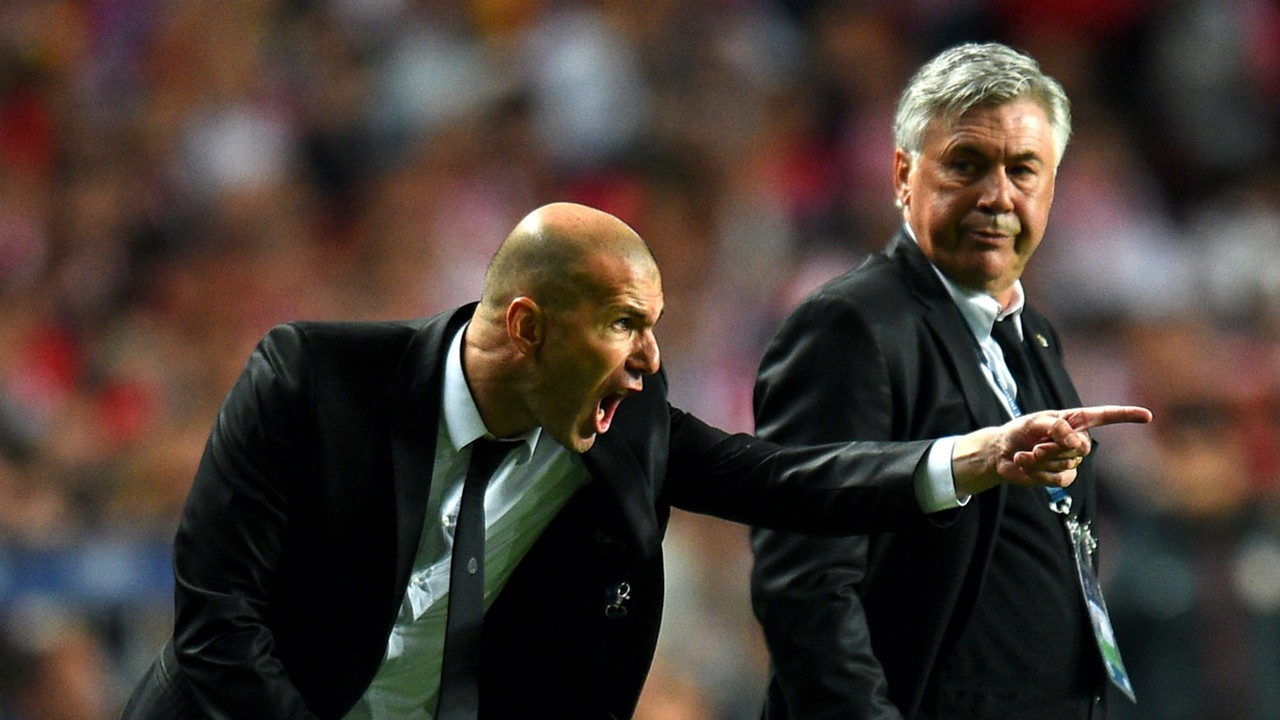

In [12]:
Image(filename='/content/yolov3/yolov3/data/images/zidane.jpg', width=600)

In [26]:
# 뭐있는지 구경하기~
!cat requirements.txt

# YOLOv3 requirements
# Usage: pip install -r requirements.txt

# Base ----------------------------------------
matplotlib>=3.2.2
numpy>=1.18.5
opencv-python>=4.1.1
Pillow>=7.1.2
PyYAML>=5.3.1
requests>=2.23.0
scipy>=1.4.1
torch>=1.7.0  # see https://pytorch.org/get-started/locally/ (recommended)
torchvision>=0.8.1
tqdm>=4.64.0
# protobuf<=3.20.1  # https://github.com/ultralytics/yolov5/issues/8012

# Logging -------------------------------------
tensorboard>=2.4.1
# clearml
# comet

# Plotting ------------------------------------
pandas>=1.1.4
seaborn>=0.11.0

# Export --------------------------------------
# coremltools>=6.0  # CoreML export
# onnx>=1.9.0  # ONNX export
# onnx-simplifier>=0.4.1  # ONNX simplifier
# nvidia-pyindex  # TensorRT export
# nvidia-tensorrt  # TensorRT export
# scikit-learn<=1.1.2  # CoreML quantization
# tensorflow>=2.4.1  # TF exports (-cpu, -aarch64, -macos)
# tensorflowjs>=3.9.0  # TF.js export
# openvino-dev  # OpenVINO export

# Deploy ----------------

In [28]:
!python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source data/images/
# --img 640 --conf 0.25 에서 conf: 신뢰도

detect: weights=['yolov3.pt'], source=data/images/, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-31-g91b0406 torch 1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

100% 119M/119M [00:19<00:00, 6.52MB/s]

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
image 1/2 /content/yolov3/yolov3/data/images/bus.jpg: 640x480 4 persons, 1 bicycle, 1 bus, Done. (0.053s)
image 2/2 /content/yolov3/yolov3/data/images/zidane.jpg: 384x640 2 persons, 2 ties, Done. (0.036s)
Speed: 0.8ms pre-process, 44.7ms inference, 10.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


In [36]:
!ls ./runs/detect/exp3

ls: cannot access './runs/detect/exp': No such file or directory


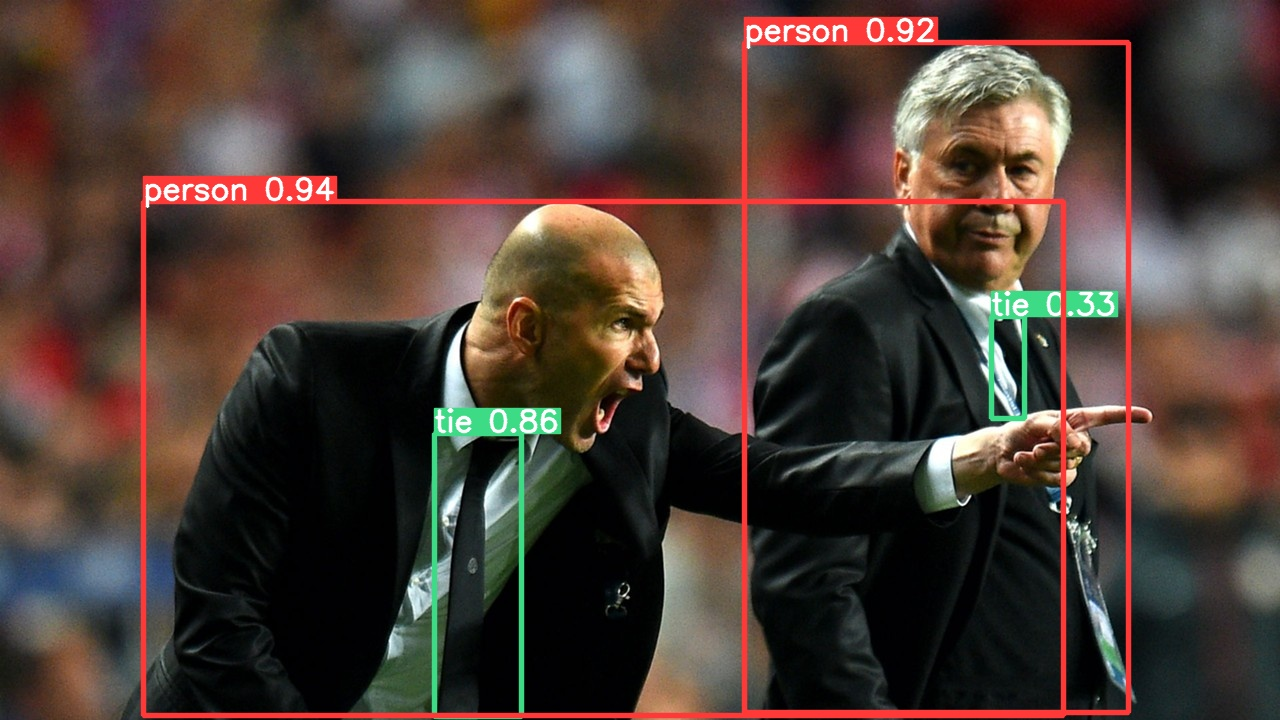

In [37]:
# 출력해보면 detect가 있을 것이다.
# 출력
Image(filename= '/content/yolov3/yolov3/runs/detect/exp3/zidane.jpg', width=600)

# YOLOv5
https://github.com/ultralytics/yolov5.git


In [38]:
!pwd

/content/yolov5


In [35]:
%cd /content
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt

import torch
from IPython.display import Image, clear_output

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 14906, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 14906 (delta 11), reused 13 (delta 2), pack-reused 14880
Receiving objects: 100% (14906/14906), 13.87 MiB | 15.98 MiB/s, done.
Resolving deltas: 100% (10256/10256), done.
/content/yolov5
     |████████████████████████████████| 184 kB 30.7 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 


# conf_thres

In [41]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images/
# yolov5s small 버전, conf : confidence threshold

detect: weights=['yolov5s.pt'], source=data/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-53-g65071da Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

100% 14.1M/14.1M [00:00<00:00, 329MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 13.2ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 13.9ms
Speed: 0.5ms pre-process, 13.6ms inference, 1.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


In [40]:
!pwd

/content/yolov5


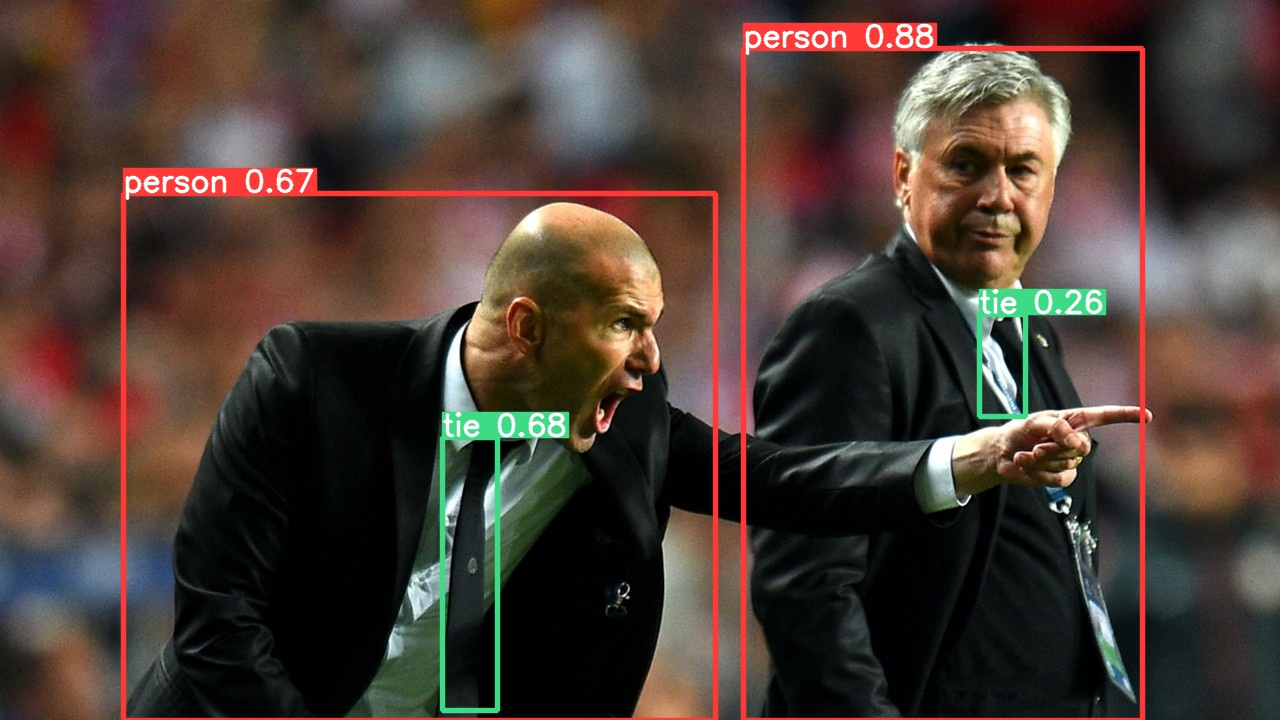

In [42]:
Image(filename ='/content/yolov5/runs/detect/exp/zidane.jpg', width=600)

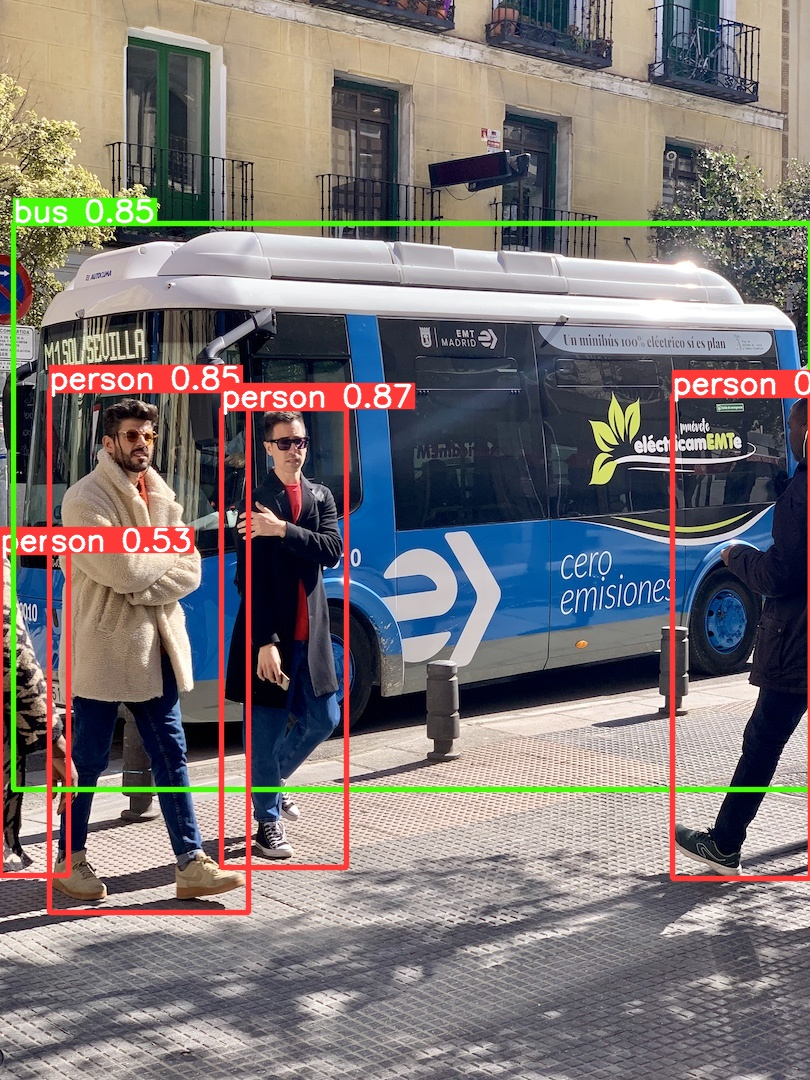

In [43]:
Image(filename ='/content/yolov5/runs/detect/exp/bus.jpg', width=600)

데이터셋 다운로드
- 포트홀 데이터셋 : https://public.roboflow.com/object-detection/pothole
- url copy : https://public.roboflow.com/ds/SI0YuY0FgW?key=nviMfhBGaI


In [45]:
%mkdir /content/yolov5/pothole
%cd /content/yolov5/pothole

/content/yolov5/pothole


In [46]:
!pwd

/content/yolov5/pothole


In [47]:
# curl은 커맨드 아린용 데이터 전송 도구. -L옵셥을 사용하여 HTTP 위치 헤더를 따르기(리다이렉션을 따르도록 curl을 사용할 수 있음)
!curl -L "https://public.roboflow.com/ds/SI0YuY0FgW?key=nviMfhBGaI" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

# roboflow.zip를 zip 하고 unzip 하고 지우기

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0   1984      0 --:--:-- --:--:-- --:--:--  1980
100 46.0M  100 46.0M    0     0  10.4M      0  0:00:04  0:00:04 --:--:-- 15.4M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/img-105_jpg.rf.3fe9dff3d1631e79ecb480ff403bcb86.jpg  
 extracting: test/images/img-107_jpg.rf.2e40485785f6e5e2efec404301b235c2.jpg  
 extracting: test/images/img-146_jpg.rf.61be25b3053a51f622a244980545df2b.jpg  
 extracting: test/images/img-161_jpg.rf.211541e7178a4a93ec0680f26b905427.jpg  
 extracting: test/images/img-168_jpg.rf.af3590e07b06b43e91fa53990ff94af3.jpg  
 extracting: test/images/img-179_jpg.rf.8632eb0d9b75fefe144829e67b75015a.jpg  
 extracting: test/images/img

# NMS

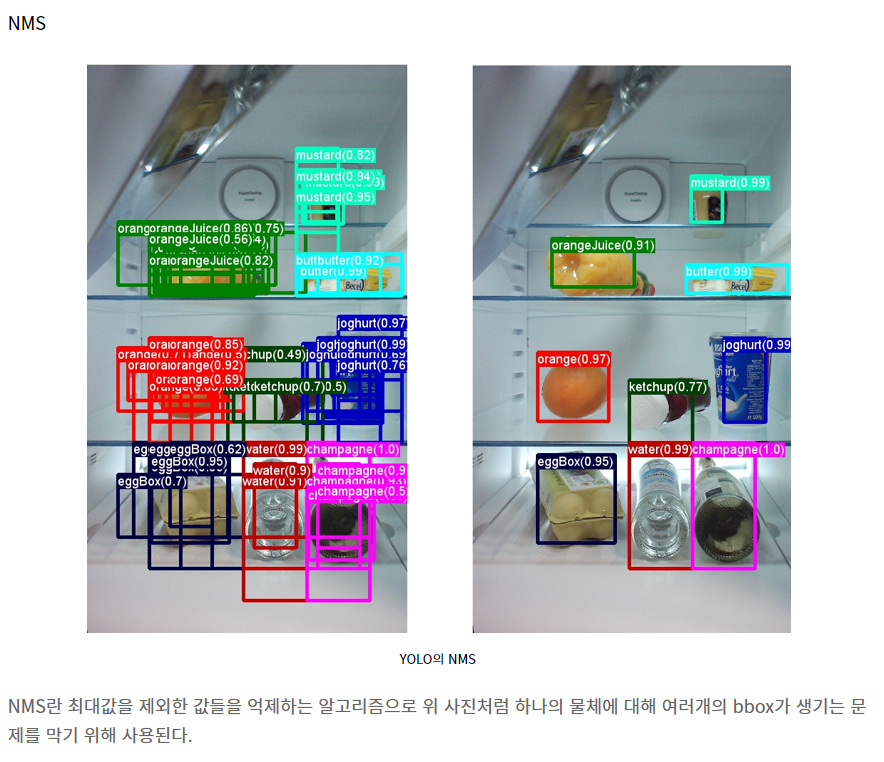

In [49]:
Image(filename ='/content/drive/MyDrive/통계/자료/nms.png', width=600)